# Bulding K means algorithm from scratch to compress images

K means algorithm: Cluster unlabelled data points to K number of groups based on their  distance between each other. 

1. Randomly initialize K number of centroids. Best way to do this is to randomly choose K number of data points from X to ensure that at least 1 point will be assigned to every centroid.  
2. Group each data point to the closest centroid. 
3. For each group, calculate the mean position of all the points assigned and update the every centroid position with their respective mean value. 

Repeat step 2,3 for n number of times to minimize the cost function. 

**Cost function** The Euclidean distance (or the pythagoras distance) between data points and their assigned centroids. 
 
* Different inital centroids will give different results, this algorithm is prone to being stuck at a local minima and therefore reruning the algorithm a few times with different initial centroids is crucial at times. We choose the centroids that gives the lowest cost function. 

## Image data
We will work with coloured image for this example. First, it is important to understand how image data is represented and understood in code. 

Every image is made out of thousands of small squares each with a uniform colour, known as pixels. An image with a 120 x 120 pixel contains 14,400 squares, each square representing one colour. There are 2 main types of images, grayscale and colored images. 

1. Grayscale: Each pixel has a number from 0-255, representing the brightness of the color. black is represented by 0, white by 255 and different shades of gray in between. 

2. Colored: Each pixel  is represented by 3 numbers, each ranging from 0-255, representing the color brightness in Red,Blue,Green scale. All the colors we know can be represented by a combination of the RGB color scale. With this we have a 3D matrix, m x n x z where m x n represent the number of pixels and z represents the RGB scale number. We can imagine 3 layers of 2D matrix stacked on top of each other, each layer representing the Red, Green and Blue color. 

Combination of different RGB brighteness can be visualized here: 


https://www.w3schools.com/colors/colors_rgb.asp?color=rgb(0,%20191,%20255)

## Image data and memory

For grayscale images, each pixel can have value from 0-255 which requires 8 bits of memory (log2(256)). For a 120x120 image, it takes 115,200 bits. 

For colored images, each pixel can hava 0-255 values for each color scale, so the memory required for each pixel is 8 bits times 3, 24 bits. For a 120x 120 image that is 345,500 bits. 



In [2]:
import numpy as np

## Randomly initializing the first values of centroids
We want K number of centroids chosen randomly to use as a starting point (initial guess) for the algorithm to iterate on and optimize the values. 

np.random.permutation(n) produces an array with n number of elements with values (1 to n, int) that are randomly arranged.

In [3]:
def centroid_initialization(X,K):
    random_index=np.random.permutation(X.shape[0])
    centroids=X[random_index[0:K],:]
    return centroids

## Grouping data points to the their closest centroids

For each data point, we calculate the euclidean distance between the data point and every centroid, group it to the datapoint with the smalledst distance. This fucntion returns idx which is an array with values 0 to K that keeps track of the index of centroid assigned to each data point in X. 

In [4]:
def closestCentroids(centroids,X):
    idx=np.zeros((X.shape[0],1),dtype=int) #Int type for indexing later
    for i in range(0,X.shape[0]):
        error=np.zeros(centroids.shape[0])
        for j in range(0,centroids.shape[0]):
            error[j]=np.sqrt(np.sum((X[i,:]-centroids[j,:])**2))
        index=np.argmin(error)
        idx[i]=index
    return idx

## Calculate the mean of all the data points for each group and updating the centroid position 

For each centroid, we iterate through all the data points and add them to the sum variable when the their idx number is the centroid's index. We then calculate the mean and take that as the new centroid. 

In [5]:
def computeCentroids(X,idx,K):
    centroids=np.zeros((K,X.shape[1]))
    for i in range(0,K):
        sum=np.zeros((1,X.shape[1]))
        count=0
        for j in range(0,X.shape[0]):
            if i==idx[j]:
                sum+=X[j,:]
                count+=1
        centroids[i,:]=np.divide(sum,count);
    return centroids 


## Finally, the algortihm! 
So far we have defined every step as a function, now we put them all together as an optimization function that runs through the whole process n number of times, each time decreasing the cost function. 

In [6]:
def runKMeans(X,K,max_iter):
    centroids=centroid_initialization(X,K)
    for iter in range(0,max_iter):
        dist=0
        print(f'K Means iteration {iter}/{max_iter}')
        idx=closestCentroids(centroids,X)
        centroids=computeCentroids(X,idx,K)
    return centroids,idx

In [7]:
import matplotlib.pyplot as plt

## Putting our algorithm to use 

In [8]:
A=plt.imread('imag4.jpg')
A=A/255
X=np.reshape(A,(A.shape[0]*A.shape[1],A.shape[2]))

In [9]:
K=7;
max_iter=5;
centroids,idx=runKMeans(X,K,max_iter);

K Means iteration 0/5
K Means iteration 1/5
K Means iteration 2/5
K Means iteration 3/5
K Means iteration 4/5


runKMeans algorithm gives us 7 centroids with optimized positions that can best group the data. The centroids are the parameters we want to optimize here. 

In [13]:
X_recovered=centroids[idx,:];
X_recovered=np.reshape(X_recovered,(A.shape));
print(X_recovered.shape)

(226, 228, 3)


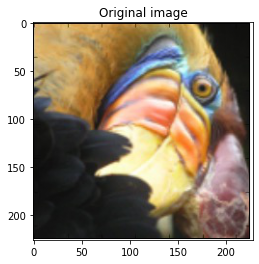

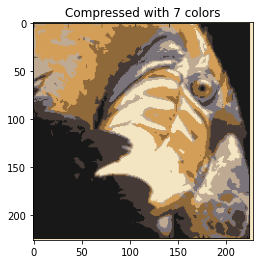

In [12]:
plt.figure()
plt.imshow(A)
plt.title('Original image')
plt.figure()
plt.imshow(X_recovered);
plt.title(f'Compressed with {K} colors');

Dtype: <class 'numpy.ndarray'>, Image shape: (107, 263, 3), minimum entry: 0, Maximum entry: 255


(28141, 3)

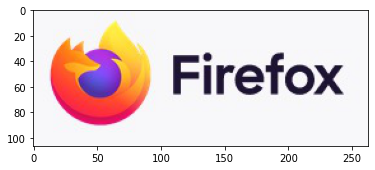

In [14]:
A=plt.imread('image3.jpg');
print(f'Dtype: {type(A)}, Image shape: {A.shape}, minimum entry: {A.min()}, Maximum entry: {A.max()}')
A=np.divide(A,255)
X=np.reshape(A,(A.shape[0]*A.shape[1],3))
X.shape

In [15]:
max_iter=5;
K=5;
centroids1,idx1=runKMeans(X,K,max_iter);

K Means iteration 0/5
K Means iteration 1/5
K Means iteration 2/5
K Means iteration 3/5
K Means iteration 4/5


In [16]:
X_recovered=centroids[idx1,:];
X_recovered=np.reshape(X_recovered,(A.shape));
print(X_recovered.shape)

(107, 263, 3)


In [17]:
idx=closestCentroids(centroids,X).astype(int);
print(idx.max(), idx.min())
X_recovered=centroids[idx,:];
X_recovered=np.reshape(X_recovered,(A.shape));

6 0


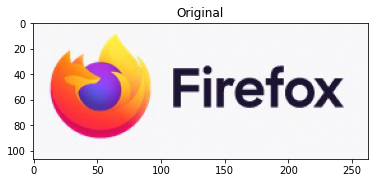

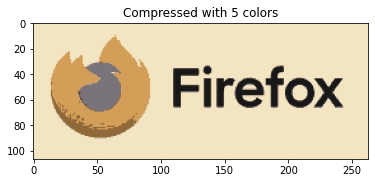

In [20]:
plt.figure()
plt.imshow(A)
plt.title('Original')
plt.figure();
plt.imshow(X_recovered);
plt.title(f'Compressed with {K} colors');

The compressed image doesnt seem to represent to original colours so well, if a human were to choose the best 5 colours to represent the image it would probably include some shade of red, yellow, blue, white and black but out compressed image consists mostly of brownish shades. This could be a sign that our algorithm is stuck at a local minima, we can try to increatse max_iter or try a using a different initial_centroid set. 

It also seems like the algorithm is much more likely to stuck in a local minima with the Firefox image